In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
from keras.models import load_model


In [ ]:
model=load_model("/content/drive/MyDrive/Aegis/NLP/VGG19 pickle files/best_model_vgg19.h5")

In [ ]:
model_temp = VGG19()

574710816/574710816 [==============================] - 2s 0us/step


In [ ]:
model_vgg19 = Model(inputs=model_temp.inputs, outputs=model_temp.layers[-2].output) 

In [ ]:
def preprocess_image(img):
    img = load_img(img, target_size=(224, 224)) #standard size that was used in training vgg16
    
    # convert image pixels to numpy array
    img = img_to_array(img) 
    img=np.expand_dims(img,axis=0)
    #Preprocesses a tensor or Numpy array encoding a batch of images.
    img = preprocess_input(img)

    return img

In [ ]:
def encode_image(img):
  img=preprocess_image(img)
  feature_vector=model_vgg19.predict(img)
  feature_vector=feature_vector.reshape(1,feature_vector.shape[1])
  return feature_vector

In [ ]:
#Upload any image of your choice in the path below 
img_path=("/content/drive/MyDrive/Aegis/NLP/NLP Project/Screenshot_447.png")

In [ ]:
max_length=34

In [ ]:
enc=encode_image(img_path)

1/1 [==============================] - 1s 820ms/step


In [ ]:
enc

array([[0.       , 0.       , 1.4694233, ..., 0.       , 1.8930264,
        1.9929677]], dtype=float32)

In [ ]:
enc.shape

(1, 4096)

In [ ]:
with open ("/content/drive/MyDrive/Aegis/NLP/VGG19 pickle files/word_2_idx_vgg19.pkl","rb") as w2i:
  word_2_idx=pickle.load(w2i)

In [ ]:
with open ("/content/drive/MyDrive/Aegis/NLP/VGG19 pickle files/idx_2_word_vgg19.pkl","rb") as i2w:
  idx_2_word=pickle.load(i2w)

In [ ]:
from PIL import Image #loading image
import matplotlib.pyplot as plt

In [ ]:

def predict_caption(photo):
    imgg= Image.open(img_path)
    plt.imshow(imgg)
    in_text = "startseq"
    max_len=34
    for i in range(max_len):
        sequence = [word_2_idx[w] for w in in_text.split() if w in word_2_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        #pad_sequences is used to ensure that all sequences in a list have the same length
        
        ypred = model.predict([photo,sequence])
        ypred = ypred.argmax() #WOrd with max prob always
        word = idx_2_word[ypred]
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    
    return final_caption

1/1 [==============================] - 0s 19ms/step


'man in black shirt and black shorts is standing on the edge of the street'

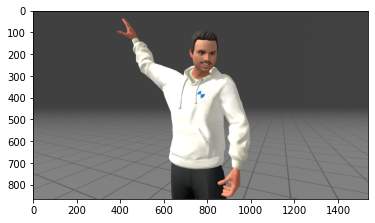

In [ ]:
predict_caption(enc)

1/1 [==============================] - 0s 28ms/step


'boy scales wall'

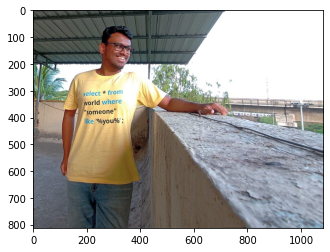

In [ ]:
#vgg19
predict_caption(enc)

1/1 [==============================] - 0s 33ms/step


'man in blue shirt and green pants is walking on the street'

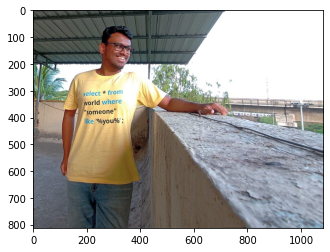

In [ ]:
#vgg16
predict_caption(enc)

Dataset link

https://github.com/jbrownlee/Datasets/releases/tag/Flickr8k

https://www.kaggle.com/datasets/adityajn105/flickr8k